In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
filename = '/content/drive/My Drive/dados_colab/Redes Neurais/PP2/dataAll.txt'
dt = np.dtype([('x1', float),('x2', float),('yd', float)])
data = np.fromfile(filename, dtype=dt)

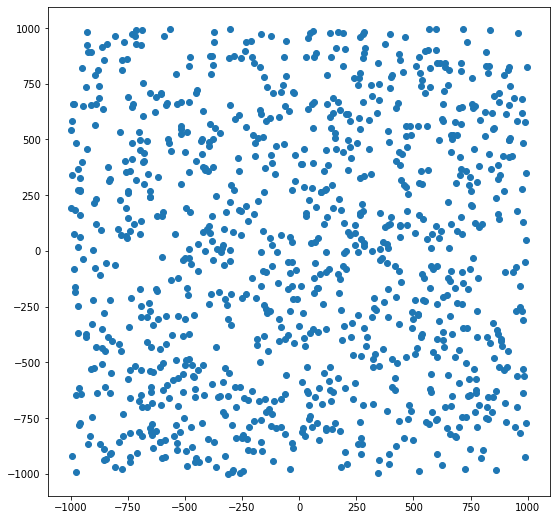

In [41]:
x = np.arange(1, 11, 1)
y = np.arange(1, 11, 1)
# plt.plot(data['x1'],data['x2'], 'ro')
plt.figure(figsize=(9, 9))
plt.scatter(data['x1'],data['x2'])
plt.show()